In [19]:
import mdtraj as md
import glob
import nglview
from rdkit.Chem import AllChem, rdFMCS
from rdkit import Chem

import seaborn as sns
import matplotlib.pyplot as plt
from simtk import unit
import numpy as np

In [20]:
mol = Chem.MolFromMolFile('tyk2/lig0.mol', removeHs=False, sanitize=False)
AllChem.Compute2DCoords(mol)


0

In [62]:
# draw mol -- include bonds and set atom indices

from rdkit.Chem.Draw import rdMolDraw2D
d = rdMolDraw2D.MolDraw2DSVG(950, 900) # or MolDraw2DSVG to get SVGs


bonds_to_mark = {#'1': [(3,7),(7,9),(9,10)],
                '2': [(14,16), (16,17), (17,19)],
                 #'3' : [(13,14), (14,16), (16,17)],
                 '4' : [(10,9), (9,7), (7,3)]
                 }

highlight_atoms = []
highlight_bonds = []
list_of_colos = [(0.8,0.0,0.8), (0.8,0.8,0.0)]#, (0.0,0.8,0.8), (0.0,0.0,0.8)]
bond_cols = {}
atoms_cols = {}

mol.GetAtomWithIdx(13).SetProp('atomNote', str(13))
mol.GetAtomWithIdx(11).SetProp('atomNote', str(11))


for bonds, cols in zip(bonds_to_mark.values(), list_of_colos):
    print(bonds)
    print(cols)
    for a,b in bonds:
        idx= mol.GetBondBetweenAtoms(a,b).GetIdx()
        highlight_bonds.append(idx)
        bond_cols[idx] = cols
        atoms_cols[a] = cols
        highlight_atoms.append(a)
        highlight_atoms.append(b)
        atoms_cols[b] = cols
        mol.GetAtomWithIdx(a).SetProp('atomNote', str(a))
        mol.GetAtomWithIdx(b).SetProp('atomNote', str(b))
print(highlight_bonds)
print(highlight_atoms)
print(bond_cols)
print(atoms_cols)
d.drawOptions().annotationFontScale = 1.0
#d.drawOptions().addAtomIndices = True

rdMolDraw2D.PrepareAndDrawMolecule(d, mol, 
                                   highlightBonds=highlight_bonds, 
                                   highlightBondColors=bond_cols,
                                   highlightAtoms=list(set(highlight_atoms)),
                                   highlightAtomColors=atoms_cols
                                  )#highlightAtoms=highlight_atoms,
                                    #highlightAtomColors=atom_cols,
                                   #highlightBonds=hit_bonds,
                                   #highlightBondColors=bond_cols)


d.FinishDrawing()
with open('atom_annotation_1.svg', 'w') as f:   
    f.write(d.GetDrawingText())


[(14, 16), (16, 17), (17, 19)]
(0.8, 0.0, 0.8)
[(10, 9), (9, 7), (7, 3)]
(0.8, 0.8, 0.0)
[23, 24, 26, 14, 12, 10]
[14, 16, 16, 17, 17, 19, 10, 9, 9, 7, 7, 3]
{23: (0.8, 0.0, 0.8), 24: (0.8, 0.0, 0.8), 26: (0.8, 0.0, 0.8), 14: (0.8, 0.8, 0.0), 12: (0.8, 0.8, 0.0), 10: (0.8, 0.8, 0.0)}
{14: (0.8, 0.0, 0.8), 16: (0.8, 0.0, 0.8), 17: (0.8, 0.0, 0.8), 19: (0.8, 0.0, 0.8), 10: (0.8, 0.8, 0.0), 9: (0.8, 0.8, 0.0), 7: (0.8, 0.8, 0.0), 3: (0.8, 0.8, 0.0)}


In [22]:
# load all trajs and weights

traj_solvent_qml = md.load(f"./tyk2/forward_lig0.solvent.pdb")
solvent_qml_weights = np.load(f"./tyk2/solvent.lig0.normalized_weights.npz", allow_pickle=True)['weights']

traj_complex_qml = md.load(f"./tyk2/lig0.complex.forward.MOL.pdb")
complex_qml_weights = np.load(f"./tyk2/complex.lig0.normalized_weights.npz", allow_pickle=True)['weights']

traj_solvent_mm = md.load(f"./tyk2/og_lig0_solvent.pdb")
traj_complex_mm = md.load(f"./tyk2/lig0.complex.MOL.pdb")

In [24]:
#plt.figure(figsize=[2, 2], dpi=300)

#dihedrals_mm = (md.compute_dihedrals(traj_solvent_mm, [[3,7,9,10]]))
#dihedrals_qml = (md.compute_dihedrals(traj_solvent_qml, [[3,7,9,10]]))
#sns.distplot(dihedrals_mm, bins=50, label='MM', )
#sns.distplot(dihedrals_qml, bins=50, label='ML/MM', hist_kws={'weights': qml_weights})
#plt.legend(prop={'size': 10})
#plt.xlim(-np.pi, np.pi)
#plt.xlabel('$\phi$(C10,N9,C7,C3) [rad]', fontsize=10)
#plt.show()

In [25]:
#plt.figure(figsize=[2, 2], dpi=300)
#dihedrals_mm = (md.compute_dihedrals(traj_solvent_mm, [[14,16,17,19]]))
#dihedrals_qml = (md.compute_dihedrals(traj_solvent_qml, [[14,16,17,19]]))
#sns.distplot(dihedrals_mm, bins=50, label='MM', )
#sns.distplot(dihedrals_qml, bins=50, label='ML/MM', hist_kws={'weights': qml_weights})
#plt.legend(prop={'size': 10})
#plt.xlim(-np.pi, np.pi)
#plt.xlabel('$\phi$(C:14,N:16,C:17,C:19) [rad]', fontsize=10)
#plt.show()

In [26]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(value / np.pi))
    if N == 0:
        return "0"
    elif N == -1:
        return r"$-\pi$"
    elif N == 1:
        return r"$\pi$"
    else:
        pass


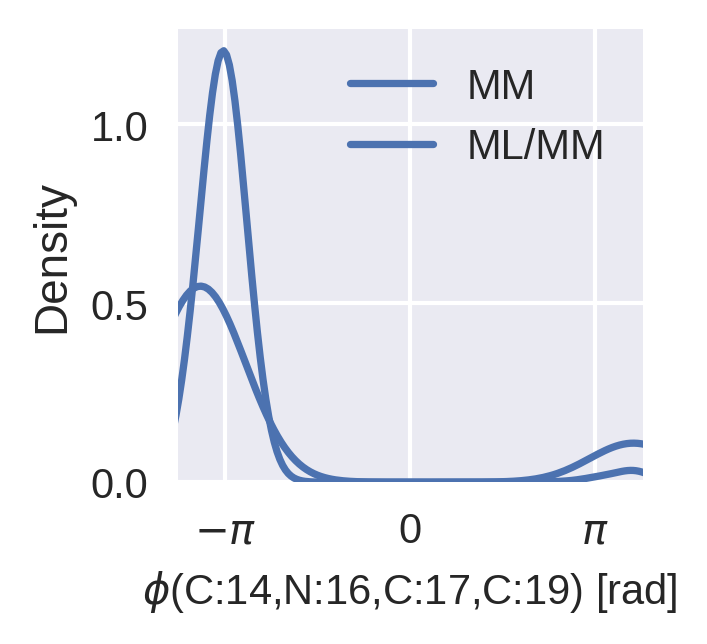

In [27]:
# test: plot kde for complex mm and qml

f,ax=plt.subplots(figsize=[2, 2], dpi=300)

dihedrals_mm = (md.compute_dihedrals(traj_complex_mm, [[13,14,16,17]]))
dihedrals_qml = (md.compute_dihedrals(traj_complex_qml, [[13,14,16,17]]))
sns.kdeplot(data=dihedrals_mm, label='MM')
sns.kdeplot(data=dihedrals_qml, label='ML/MM', weights = solvent_qml_weights)
plt.legend(prop={'size': 10})
plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

plt.xlabel('$\phi$(C:14,N:16,C:17,C:19) [rad]', fontsize=10)
plt.show()
plt.close()

/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning


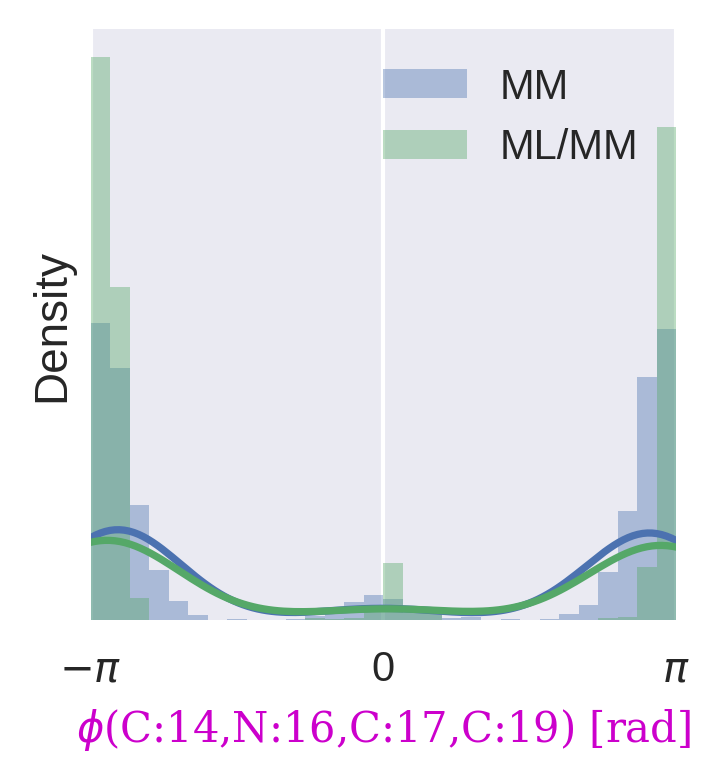

In [114]:
# plot hist and kde for 14,16,17,19 in solution

font = {'family': 'serif',
        'color':  '#cc00ccff',
        'weight': 'normal',
        'size': 16,
        }

f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)
dihedrals_mm = (md.compute_dihedrals(traj_solvent_mm, [[14,16,17,19]]))
dihedrals_qml = (md.compute_dihedrals(traj_solvent_qml, [[14,16,17,19]]))
sns.distplot(dihedrals_mm, bins=30, label='MM', norm_hist=True)
sns.distplot(dihedrals_qml, bins=30, label='ML/MM', hist_kws={'weights': solvent_qml_weights}, norm_hist=True)
plt.legend(prop={'size': 10})
plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
ax.set(xticks=ticks_)
ax.axes.get_yaxis().set_ticks([])
plt.tight_layout()
#plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('$\phi$(C:14,N:16,C:17,C:19) [rad]', fontsize=10, fontdict=font)
plt.show()
plt.close()

/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning


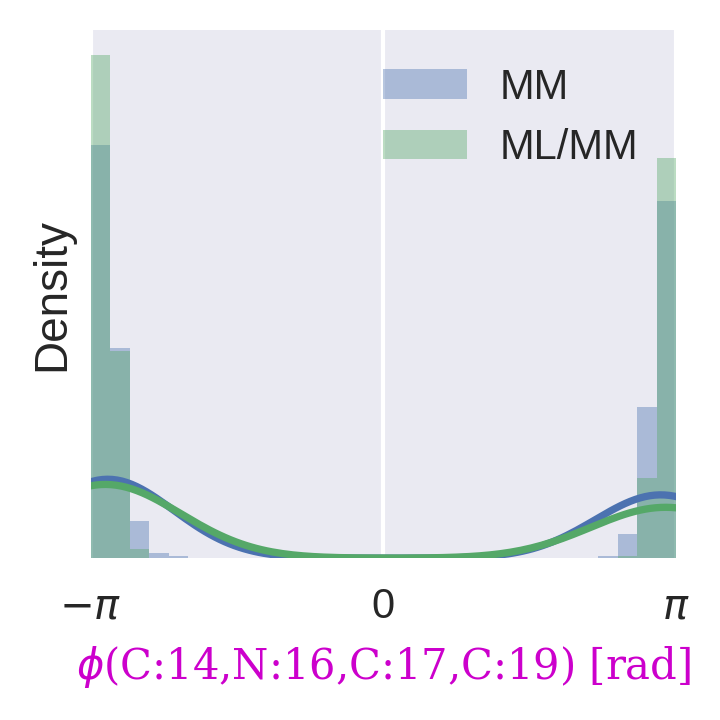

In [113]:
# plot hist and kde for 14,16,17,19 in complex

font = {'family': 'serif',
        'color':  '#cc00ccff',
        'weight': 'normal',
        'size': 16,
        }

f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)
dihedrals_mm = (md.compute_dihedrals(traj_complex_mm, [[14,16,17,19]]))
dihedrals_qml = (md.compute_dihedrals(traj_complex_qml, [[14,16,17,19]]))
sns.distplot(dihedrals_mm, bins=30, label='MM', kde=True)
sns.distplot(dihedrals_qml, bins=30, label='ML/MM', hist_kws={'weights': complex_qml_weights}, kde=True)
plt.legend(prop={'size': 10})
plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
ax.set(xticks=ticks_)
ax.axes.get_yaxis().set_ticks([])
plt.xlabel('$\phi$(C:14,N:16,C:17,C:19) [rad]', fontsize=10, fontdict=font)
plt.tight_layout()

plt.show()
plt.close()

/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning


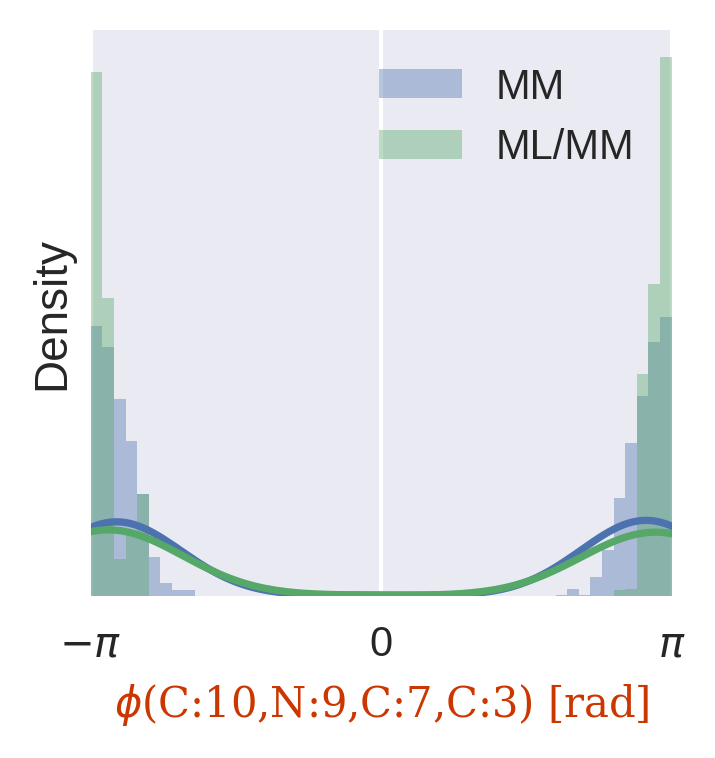

In [82]:
# plot hist and kde for 10,9,7,3 in solvent

font = {'family': 'serif',
        'color':  '#cc3600ff',
        'weight': 'normal',
        'size': 16,
        }


f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)
dihedrals_mm = (md.compute_dihedrals(traj_solvent_mm, [[10,9,7,3]]))
dihedrals_qml = (md.compute_dihedrals(traj_solvent_qml, [[10,9,7,3]]))
sns.distplot(dihedrals_mm, bins=50, label='MM', norm_hist=True)
sns.distplot(dihedrals_qml, bins=50, label='ML/MM', hist_kws={'weights': solvent_qml_weights}, norm_hist=True)
plt.legend(prop={'size': 10})
plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
ax.set(xticks=ticks_)
ax.axes.get_yaxis().set_ticks([])
plt.xlabel('$\phi$(C:10,N:9,C:7,C:3) [rad]', fontsize=10, fontdict=font)
plt.show()

/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning


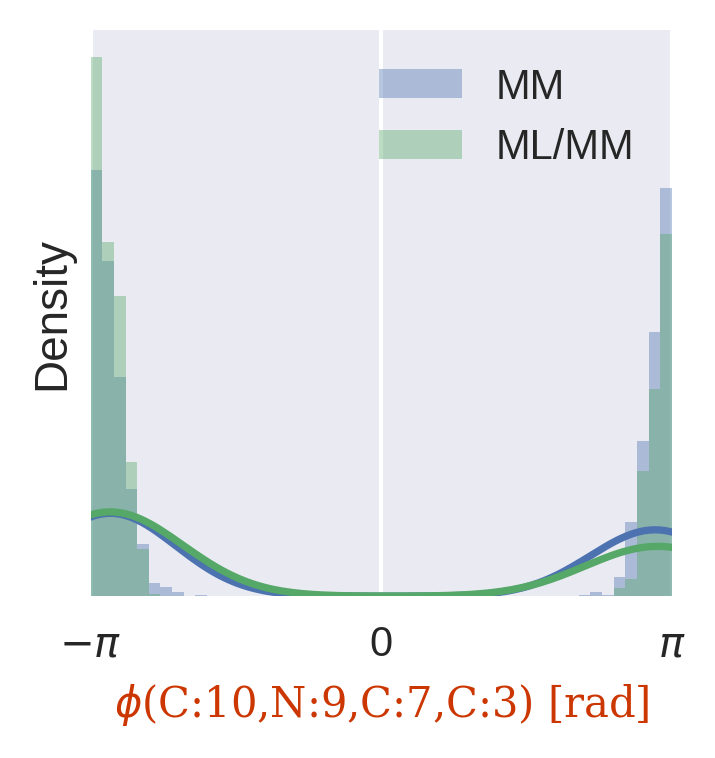

In [83]:
# plot hist and kde for 10,9,7,3 in complex

font = {'family': 'serif',
        'color':  '#cc3600ff',
        'weight': 'normal',
        'size': 16,
        }

f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)
dihedrals_mm = (md.compute_dihedrals(traj_complex_mm, [[10,9,7,3]]))
dihedrals_qml = (md.compute_dihedrals(traj_complex_qml, [[10,9,7,3]]))
sns.distplot(dihedrals_mm, bins=50, label='MM', norm_hist=True)
sns.distplot(dihedrals_qml, bins=50, label='ML/MM', hist_kws={'weights': complex_qml_weights}, norm_hist=True)
plt.legend(prop={'size': 10})
plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
ax.set(xticks=ticks_)
ax.axes.get_yaxis().set_ticks([])
plt.xlabel('$\phi$(C:10,N:9,C:7,C:3) [rad]', fontsize=10, fontdict=font)
plt.show()

/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning


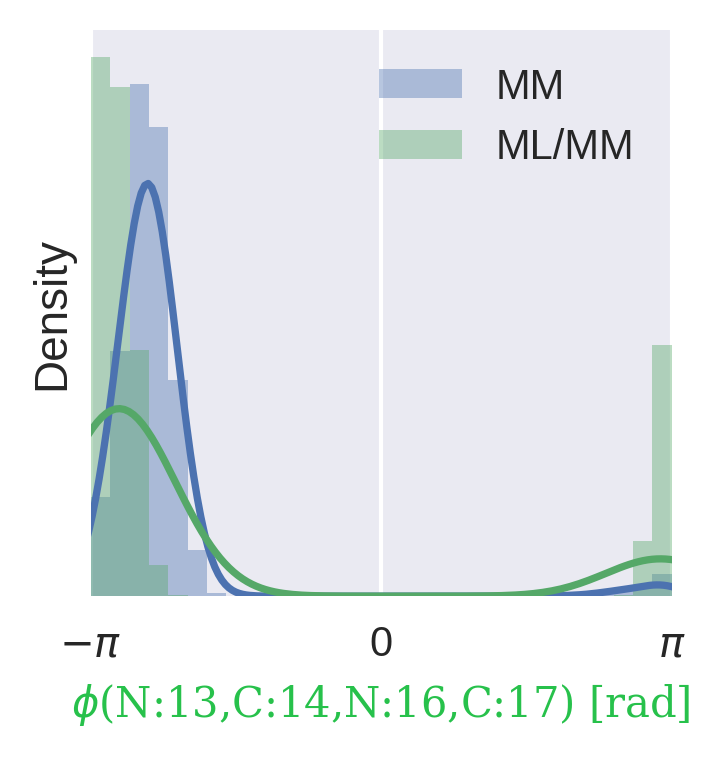

In [106]:
# plot hist and kde for 13,14,16,17 in complex

font = {'family': 'serif',
        'color':  '#27c14bff',
        'weight': 'normal',
        'size': 16,
        }

f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)
dihedrals_mm = (md.compute_dihedrals(traj_complex_mm, [[13,14,16,17]]))
dihedrals_qml = (md.compute_dihedrals(traj_complex_qml, [[13,14,16,17]]))
sns.distplot(dihedrals_mm, bins=30, label='MM', norm_hist=True)
sns.distplot(dihedrals_qml, bins=30, label='ML/MM', hist_kws={'weights': complex_qml_weights}, norm_hist=True)
plt.legend(prop={'size': 10})
plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
ax.set(xticks=ticks_)
ax.axes.get_yaxis().set_ticks([])
plt.xlabel('$\phi$(N:13,C:14,N:16,C:17) [rad]', fontsize=10, fontdict=font)
plt.show()

/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning


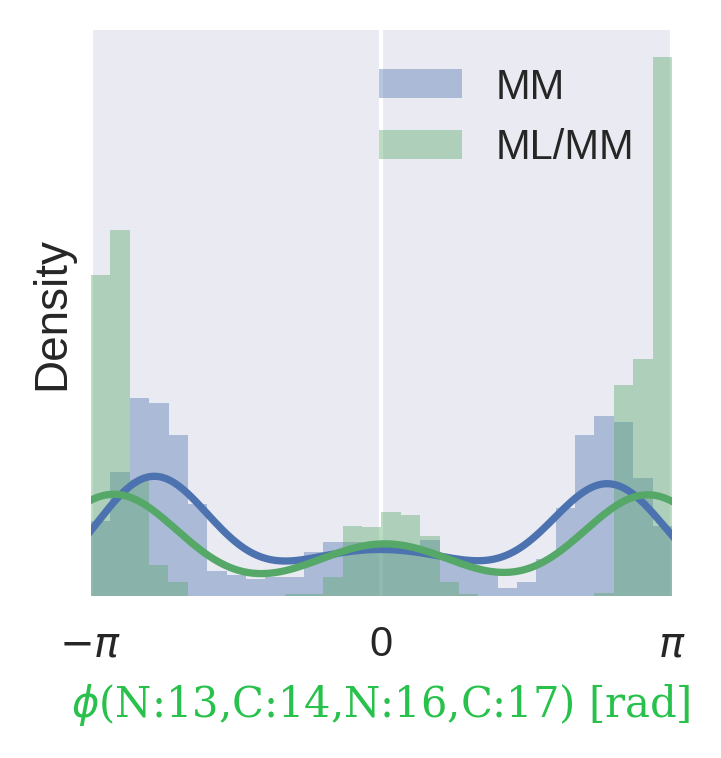

In [105]:
# plot hist and kde for 13,14,16,17 in solvent

font = {'family': 'serif',
        'color':  '#27c14bff',
        'weight': 'normal',
        'size': 16,
        }


f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)
dihedrals_mm = (md.compute_dihedrals(traj_solvent_mm, [[13,14,16,17]]))
dihedrals_qml = (md.compute_dihedrals(traj_solvent_qml, [[13,14,16,17]]))
sns.distplot(dihedrals_mm, bins=30, label='MM', norm_hist=True)
sns.distplot(dihedrals_qml, bins=30, label='ML/MM', hist_kws={'weights': solvent_qml_weights}, norm_hist=True)
plt.legend(prop={'size': 10})
plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
ax.set(xticks=ticks_)
ax.axes.get_yaxis().set_ticks([])
plt.xlabel('$\phi$(N:13,C:14,N:16,C:17) [rad]', fontsize=10, fontdict=font)
plt.show()

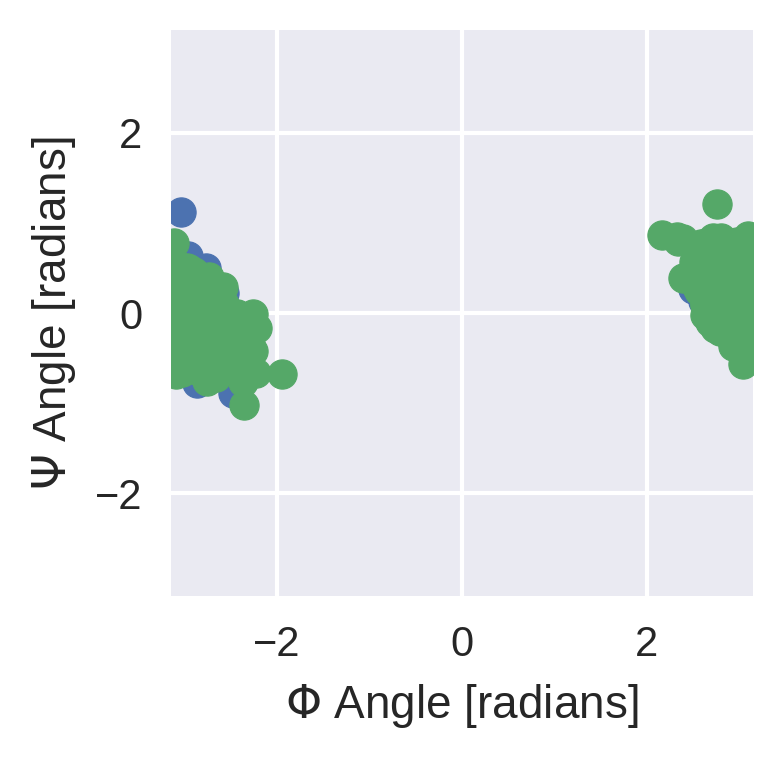

In [32]:
# plot scatter plot for 10,9,7,3 vs 11,10,9,7

f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)

dihedrals_mm_1 = md.compute_dihedrals(traj_complex_mm, [[10,9,7,3]])
dihedrals_qml_1 = md.compute_dihedrals(traj_complex_qml, [[10,9,7,3]])

dihedrals_mm_2 = md.compute_dihedrals(traj_complex_mm, [[11,10,9,7]])
dihedrals_qml_2 = md.compute_dihedrals(traj_complex_qml, [[11,10,9,7]])

plt.scatter(dihedrals_qml_1, dihedrals_qml_2)
plt.scatter(dihedrals_mm_1, dihedrals_mm_2)

plt.xlabel(r'$\Phi$ Angle [radians]')
plt.xlim(-np.pi, np.pi)

plt.ylabel(r'$\Psi$ Angle [radians]')
plt.ylim(-np.pi, np.pi)

plt.show()
plt.close()

/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning


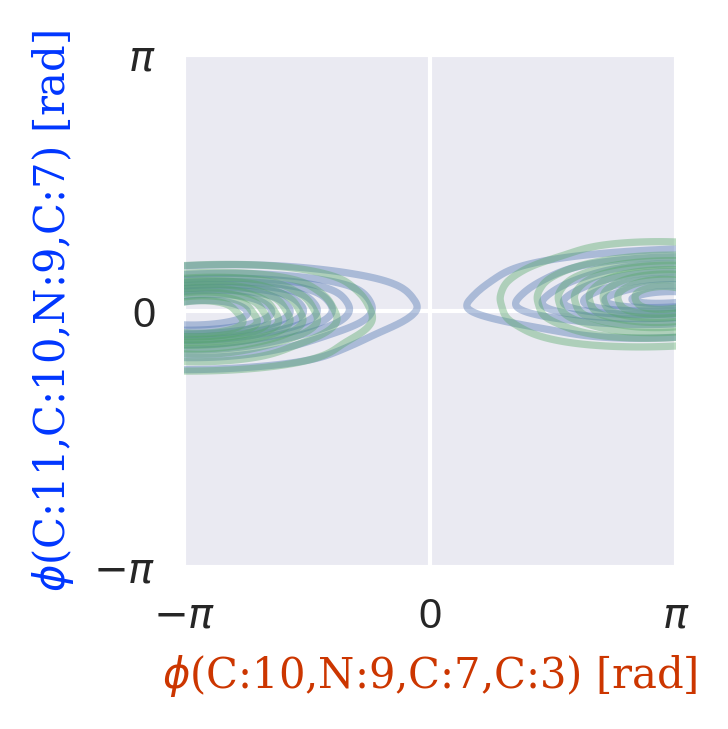

In [86]:
# plot contour plot for 10,9,7,3 vs 11,10,9,7 in complex

font1 = {'family': 'serif',
        'color':  '#cc3600ff',
        'weight': 'normal',
        'size': 16,
        }

font2 = {'family': 'serif',
        'color':  '#0036ffff',
        'weight': 'normal',
        'size': 16,
        }



f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)

dihedrals_mm_1 = list(md.compute_dihedrals(traj_complex_mm, [[10,9,7,3]]).flat)
dihedrals_qml_1 = list(md.compute_dihedrals(traj_complex_qml, [[10,9,7,3]]).flat)

dihedrals_mm_2 = list(md.compute_dihedrals(traj_complex_mm, [[11,10,9,7]]).flat)
dihedrals_qml_2 = list(md.compute_dihedrals(traj_complex_qml, [[11,10,9,7]]).flat)


sns.kdeplot(dihedrals_qml_1, dihedrals_qml_2, weights=complex_qml_weights, shade=False, alpha=0.4, label='ML/MM')
sns.kdeplot(dihedrals_mm_1, dihedrals_mm_2, shade=False, alpha=0.4, label='MM')
plt.xlabel(r'$\Phi$ Angle [radians]')

plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
ax.set(xticks=ticks_)
ax.set(yticks=ticks_)

plt.ylabel(r'$\Psi$ Angle [radians]')
plt.ylim(-np.pi, np.pi)
plt.xlabel('$\phi$(C:10,N:9,C:7,C:3) [rad]', fontsize=10, fontdict=font1)
plt.ylabel('$\phi$(C:11,C:10,N:9,C:7) [rad]', fontsize=10, fontdict=font2)
#plt.legend()
plt.tight_layout()
plt.show()
plt.close()


/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning


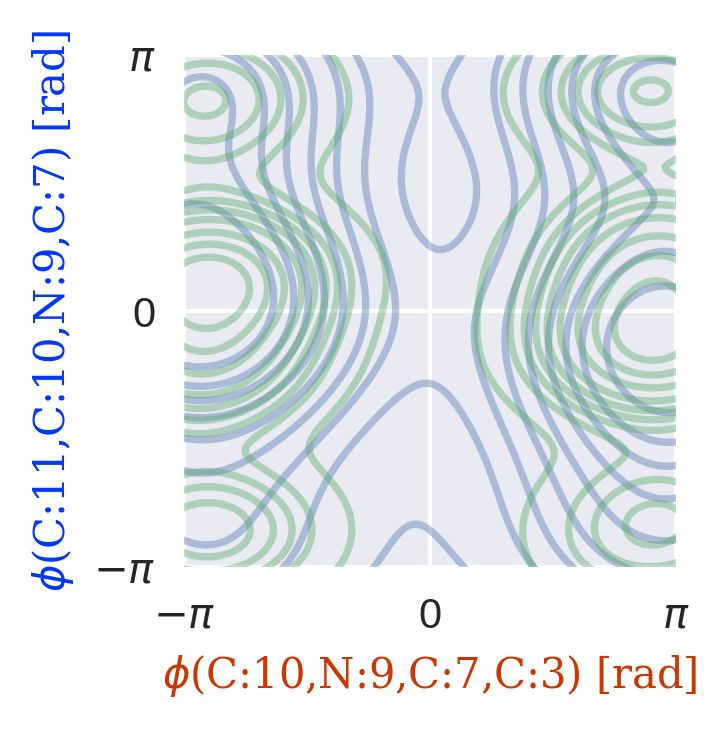

In [87]:
# plot contour plot for 10,9,7,3 vs 11,10,9,7 in solution

font1 = {'family': 'serif',
        'color':  '#cc3600ff',
        'weight': 'normal',
        'size': 16,
        }

font2 = {'family': 'serif',
        'color':  '#0036ffff',
        'weight': 'normal',
        'size': 16,
        }

f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)

dihedrals_mm_1 = list(md.compute_dihedrals(traj_solvent_mm, [[10,9,7,3]]).flat)
dihedrals_qml_1 = list(md.compute_dihedrals(traj_solvent_qml, [[10,9,7,3]]).flat)

dihedrals_mm_2 = list(md.compute_dihedrals(traj_solvent_mm, [[11,10,9,7]]).flat)
dihedrals_qml_2 = list(md.compute_dihedrals(traj_solvent_qml, [[11,10,9,7]]).flat)


sns.kdeplot(dihedrals_qml_1, dihedrals_qml_2, weights=solvent_qml_weights, shade=False, alpha=0.4, label='ML/MM')
sns.kdeplot(dihedrals_mm_1, dihedrals_mm_2, shade=False, alpha=0.4, label='MM')
plt.xlabel(r'$\Phi$ Angle [radians]')

plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
ax.set(xticks=ticks_)
ax.set(yticks=ticks_)

plt.ylabel(r'$\Psi$ Angle [radians]')
plt.ylim(-np.pi, np.pi)
plt.xlabel('$\phi$(C:10,N:9,C:7,C:3) [rad]', fontsize=10, fontdict=font1)
plt.ylabel('$\phi$(C:11,C:10,N:9,C:7) [rad]', fontsize=10, fontdict=font2)
#plt.legend()
plt.tight_layout()
plt.show()
plt.close()


No handles with labels found to put in legend.


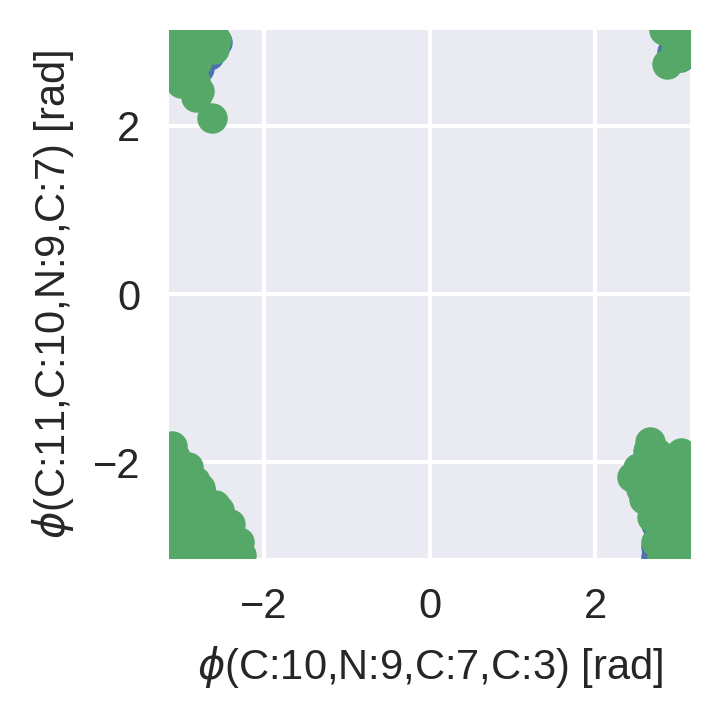

In [49]:
# plot scatter plot for 14,16,17,19 vs 13,14,16,17 in complex

plt.style.use('seaborn')

f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)

dihedrals_mm_1 = md.compute_dihedrals(traj_complex_mm, [[19,17,16,14]])
dihedrals_qml_1 = md.compute_dihedrals(traj_complex_qml, [[19,17,16,14]])

dihedrals_mm_2 = md.compute_dihedrals(traj_complex_mm, [[17,16,14,13]])
dihedrals_qml_2 = md.compute_dihedrals(traj_complex_qml, [[17,16,14,13]])

plt.scatter(dihedrals_qml_1, dihedrals_qml_2)
plt.scatter(dihedrals_mm_1, dihedrals_mm_2)

plt.xlabel(r'$\Phi$ Angle [radians]')
plt.xlim(-np.pi, np.pi)
plt.ylabel(r'$\Psi$ Angle [radians]')
plt.ylim(-np.pi, np.pi)

plt.ylabel(r'$\Psi$ Angle [radians]')
plt.ylim(-np.pi, np.pi)
plt.xlabel('$\phi$(C:10,N:9,C:7,C:3) [rad]', fontsize=10)
plt.ylabel('$\phi$(C:11,C:10,N:9,C:7) [rad]', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()


/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning


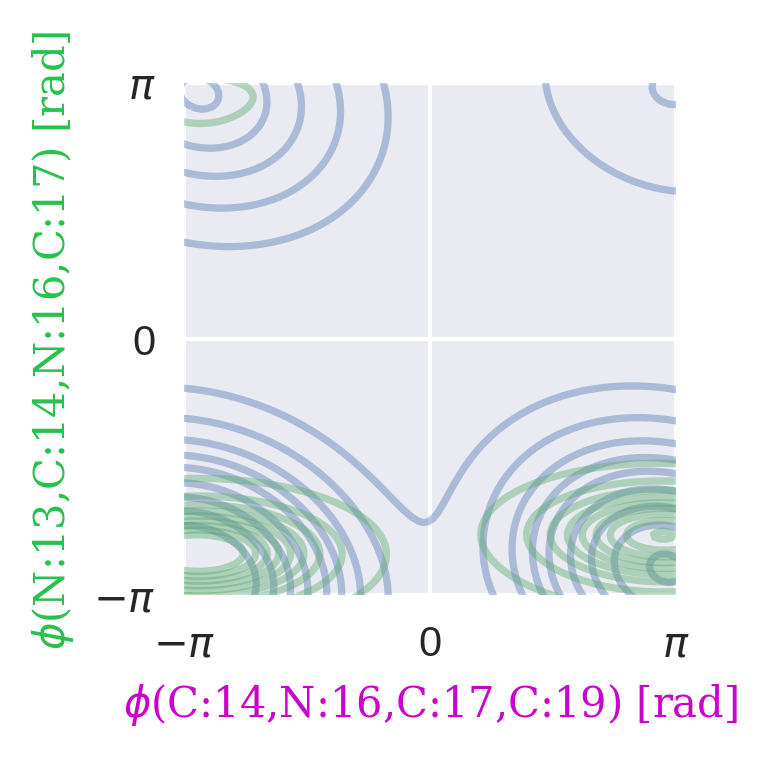

In [88]:
# plot contour plot for 14,16,17,19 vs 13,14,16,17 in complex


font1 = {'family': 'serif',
        'color':  '#cc00ccff',
        'weight': 'normal',
        'size': 16,
        }


font2 = {'family': 'serif',
        'color':  '#27c14bff',
        'weight': 'normal',
        'size': 16,
        }


f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)

dihedrals_mm_1 = list(md.compute_dihedrals(traj_complex_mm, [[19,17,16,14]]).flat)
dihedrals_qml_1 = list(md.compute_dihedrals(traj_complex_qml, [[19,17,16,14]]).flat)

dihedrals_mm_2 = list(md.compute_dihedrals(traj_complex_mm, [[17,16,14,13]]).flat)
dihedrals_qml_2 = list(md.compute_dihedrals(traj_complex_qml, [[17,16,14,13]]).flat)


sns.kdeplot(dihedrals_qml_1, dihedrals_qml_2, weights=complex_qml_weights, shade=False, alpha=0.4, label='ML/MM')
sns.kdeplot(dihedrals_mm_1, dihedrals_mm_2, shade=False, alpha=0.4, label='MM')
plt.xlabel(r'$\Phi$ Angle [radians]')
plt.xlim(-np.pi, np.pi)

plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
ax.set(xticks=ticks_)
ax.set(yticks=ticks_)


plt.ylabel(r'$\Psi$ Angle [radians]')
plt.ylim(-np.pi, np.pi)
#plt.legend()
plt.xlabel('$\phi$(C:14,N:16,C:17,C:19) [rad]', fontsize=10, fontdict=font1)
plt.ylabel('$\phi$(N:13,C:14,N:16,C:17) [rad]', fontsize=10, fontdict=font2)
plt.tight_layout()
plt.show()
plt.close()


/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/distributions.py:1606: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3

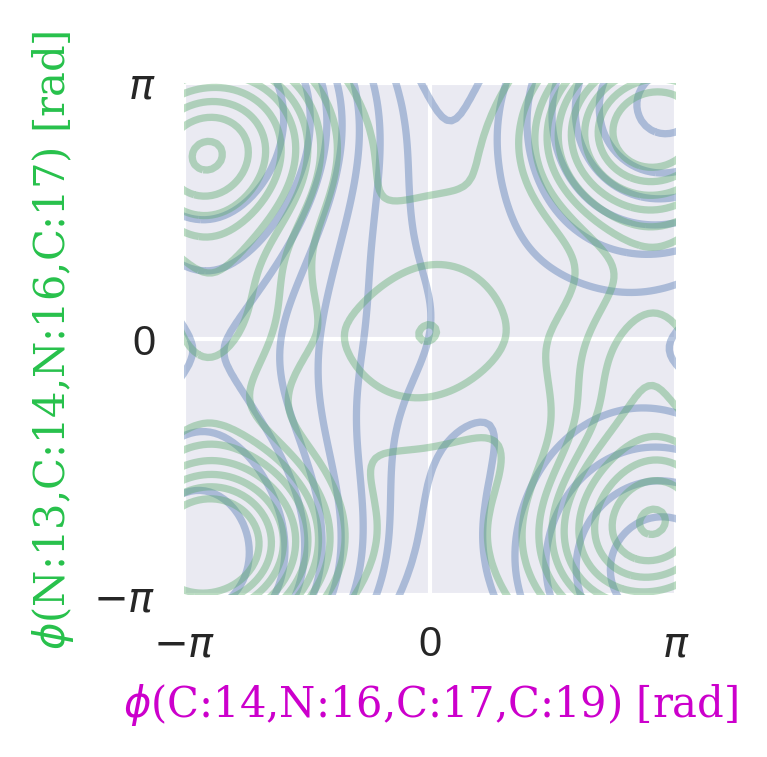

In [92]:
# plot contour plot for 14,16,17,19 vs 13,14,16,17 in solvent


font1 = {'family': 'serif',
        'color':  '#cc00ccff',
        'weight': 'normal',
        'size': 16,
        }


font2 = {'family': 'serif',
        'color':  '#27c14bff',
        'weight': 'normal',
        'size': 16,
        }



f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)

dihedrals_mm_1 = list(md.compute_dihedrals(traj_solvent_mm, [[19,17,16,14]]).flat)
dihedrals_qml_1 = list(md.compute_dihedrals(traj_solvent_qml, [[19,17,16,14]]).flat)

dihedrals_mm_2 = list(md.compute_dihedrals(traj_solvent_mm, [[17,16,14,13]]).flat)
dihedrals_qml_2 = list(md.compute_dihedrals(traj_solvent_qml, [[17,16,14,13]]).flat)


sns.kdeplot(dihedrals_qml_1, dihedrals_qml_2, weights=solvent_qml_weights, shade=False, shade_lowest=False, alpha=0.4, label='ML/MM')
sns.kdeplot(dihedrals_mm_1, dihedrals_mm_2,  shade=False, alpha=0.4, shade_lowest=False, label='MM')
plt.xlabel(r'$\Phi$ Angle [radians]')
plt.xlim(-np.pi, np.pi)

plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
ax.set(xticks=ticks_)
ax.set(yticks=ticks_)


plt.ylabel(r'$\Psi$ Angle [radians]')
plt.ylim(-np.pi, np.pi)
#plt.legend()
plt.xlabel('$\phi$(C:14,N:16,C:17,C:19) [rad]', fontsize=10, fontdict=font1)
plt.ylabel('$\phi$(N:13,C:14,N:16,C:17) [rad]', fontsize=10, fontdict=font2)
plt.tight_layout()
plt.show()
plt.close()


/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning


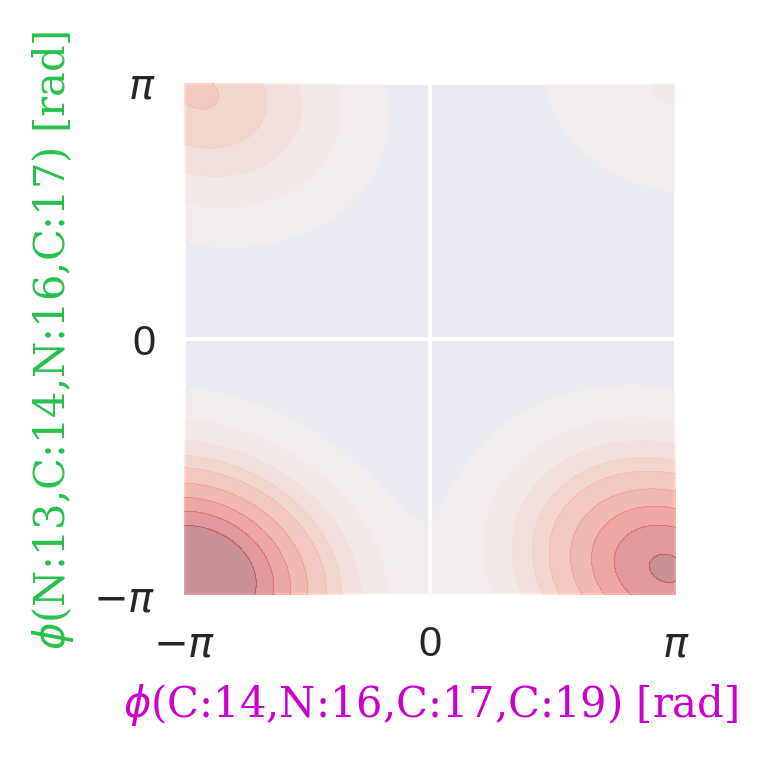

In [115]:
# plot shadowed contour plot for 14,16,17,19 vs 13,14,16,17 in complex for ML/MM



font1 = {'family': 'serif',
        'color':  '#cc00ccff',
        'weight': 'normal',
        'size': 16,
        }


font2 = {'family': 'serif',
        'color':  '#27c14bff',
        'weight': 'normal',
        'size': 16,
        }


f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)

dihedrals_mm_1 = list(md.compute_dihedrals(traj_complex_mm, [[14,16,17,19]]).flat)
dihedrals_qml_1 = list(md.compute_dihedrals(traj_complex_qml, [[14,16,17,19]]).flat)

dihedrals_mm_2 = list(md.compute_dihedrals(traj_complex_mm, [[13,14,16,17]]).flat)
dihedrals_qml_2 = list(md.compute_dihedrals(traj_complex_qml, [[13,14,16,17]]).flat)


sns.kdeplot(dihedrals_qml_1, dihedrals_qml_2, weights=complex_qml_weights, shade=True, cmap='Reds', alpha=0.4, label='ML/MM')
#sns.kdeplot(dihedrals_mm_1, dihedrals_mm_2, shade=False, alpha=0.4, label='MM')
plt.xlabel(r'$\Phi$ Angle [radians]')
plt.xlim(-np.pi, np.pi)

plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
ax.set(xticks=ticks_)
ax.set(yticks=ticks_)


plt.ylabel(r'$\Psi$ Angle [radians]')
plt.ylim(-np.pi, np.pi)
plt.xlabel('$\phi$(C:14,N:16,C:17,C:19) [rad]', fontsize=10, fontdict=font1)
plt.ylabel('$\phi$(N:13,C:14,N:16,C:17) [rad]', fontsize=10, fontdict=font2)
plt.tight_layout()
plt.show()
plt.close()


/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning


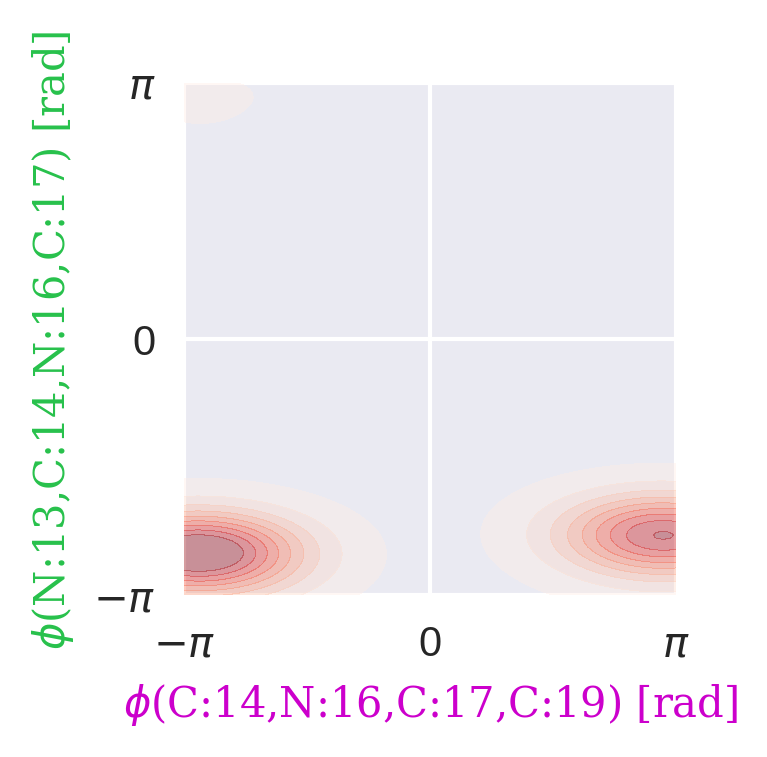

In [116]:
# plot shadowed contour plot for 14,16,17,19 vs 13,14,16,17 in complex for MM

font1 = {'family': 'serif',
        'color':  '#cc00ccff',
        'weight': 'normal',
        'size': 16,
        }


font2 = {'family': 'serif',
        'color':  '#27c14bff',
        'weight': 'normal',
        'size': 16,
        }


f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)

dihedrals_mm_1 = list(md.compute_dihedrals(traj_complex_mm, [[14,16,17,19]]).flat)
dihedrals_qml_1 = list(md.compute_dihedrals(traj_complex_qml, [[14,16,17,19]]).flat)

dihedrals_mm_2 = list(md.compute_dihedrals(traj_complex_mm, [[13,14,16,17]]).flat)
dihedrals_qml_2 = list(md.compute_dihedrals(traj_complex_qml, [[13,14,16,17]]).flat)


#sns.kdeplot(dihedrals_qml_1, dihedrals_qml_2, weights=complex_qml_weights, shade=True, cmap='Reds', alpha=0.4, label='ML/MM')
sns.kdeplot(dihedrals_mm_1, dihedrals_mm_2, shade=True, cmap='Reds', alpha=0.4, label='MM')
plt.xlabel(r'$\Phi$ Angle [radians]')
plt.xlim(-np.pi, np.pi)

plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
ax.set(xticks=ticks_)
ax.set(yticks=ticks_)


plt.ylabel(r'$\Psi$ Angle [radians]')
plt.ylim(-np.pi, np.pi)
plt.xlabel('$\phi$(C:14,N:16,C:17,C:19) [rad]', fontsize=10, fontdict=font1)
plt.ylabel('$\phi$(N:13,C:14,N:16,C:17) [rad]', fontsize=10, fontdict=font2)
plt.tight_layout()
plt.show()
plt.close()


/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning


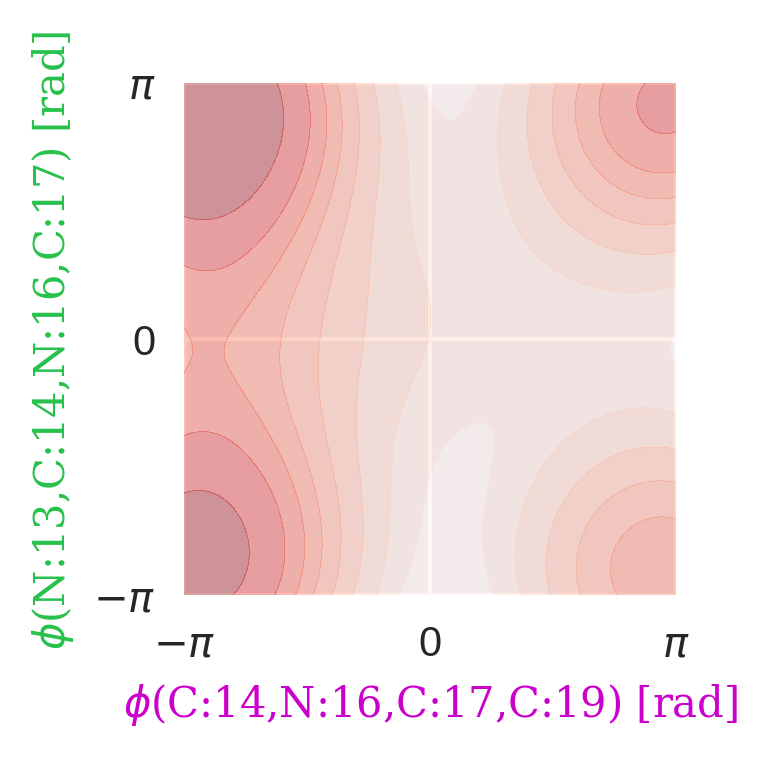

In [117]:
# plot shadowed contour plot for 14,16,17,19 vs 13,14,16,17 in solvent for ML/MM


font1 = {'family': 'serif',
        'color':  '#cc00ccff',
        'weight': 'normal',
        'size': 16,
        }


font2 = {'family': 'serif',
        'color':  '#27c14bff',
        'weight': 'normal',
        'size': 16,
        }


f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)

dihedrals_mm_1 = list(md.compute_dihedrals(traj_solvent_mm, [[14,16,17,19]]).flat)
dihedrals_qml_1 = list(md.compute_dihedrals(traj_solvent_qml, [[14,16,17,19]]).flat)

dihedrals_mm_2 = list(md.compute_dihedrals(traj_solvent_mm, [[13,14,16,17]]).flat)
dihedrals_qml_2 = list(md.compute_dihedrals(traj_solvent_qml, [[13,14,16,17]]).flat)


sns.kdeplot(dihedrals_qml_1, dihedrals_qml_2, weights=solvent_qml_weights, shade=True, cmap='Reds', alpha=0.4, label='ML/MM')
#sns.kdeplot(dihedrals_mm_1, dihedrals_mm_2, shade=False, alpha=0.4, label='MM')
plt.xlabel(r'$\Phi$ Angle [radians]')
plt.xlim(-np.pi, np.pi)

plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
ax.set(xticks=ticks_)
ax.set(yticks=ticks_)


plt.ylabel(r'$\Psi$ Angle [radians]')
plt.ylim(-np.pi, np.pi)
plt.xlabel('$\phi$(C:14,N:16,C:17,C:19) [rad]', fontsize=10, fontdict=font1)
plt.ylabel('$\phi$(N:13,C:14,N:16,C:17) [rad]', fontsize=10, fontdict=font2)
plt.tight_layout()
plt.show()
plt.close()


/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning


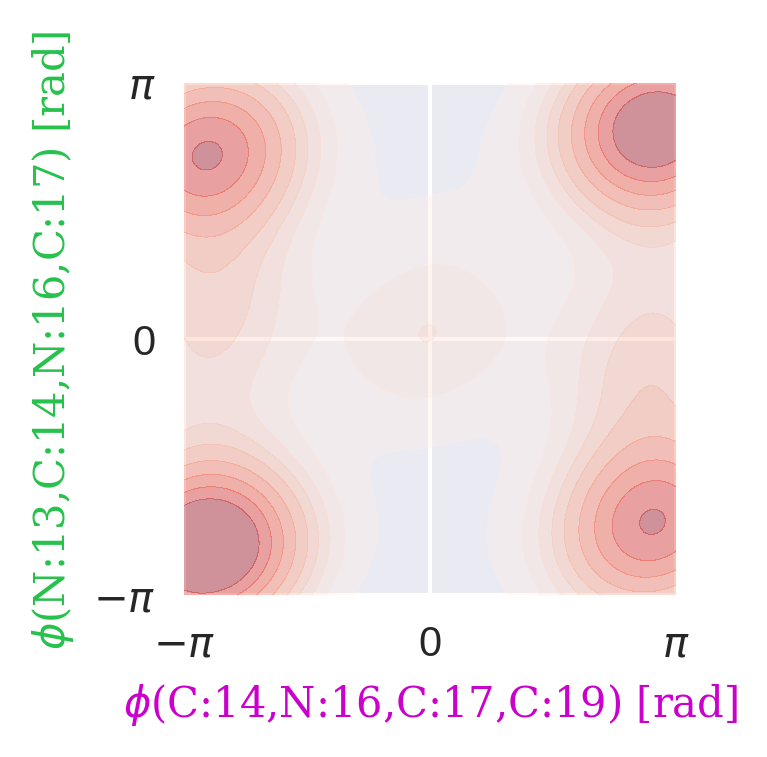

In [120]:
# plot shadowed contour plot for 14,16,17,19 vs 13,14,16,17 in solvent for MM


font1 = {'family': 'serif',
        'color':  '#cc00ccff',
        'weight': 'normal',
        'size': 16,
        }


font2 = {'family': 'serif',
        'color':  '#27c14bff',
        'weight': 'normal',
        'size': 16,
        }


f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)

dihedrals_mm_1 = list(md.compute_dihedrals(traj_solvent_mm, [[14,16,17,19]]).flat)
dihedrals_qml_1 = list(md.compute_dihedrals(traj_solvent_qml, [[14,16,17,19]]).flat)

dihedrals_mm_2 = list(md.compute_dihedrals(traj_solvent_mm, [[13,14,16,17]]).flat)
dihedrals_qml_2 = list(md.compute_dihedrals(traj_solvent_qml, [[13,14,16,17]]).flat)


#sns.kdeplot(dihedrals_qml_1, dihedrals_qml_2, weights=solvent_qml_weights, shade=True, cmap='Reds', alpha=0.4, label='ML/MM')
sns.kdeplot(dihedrals_mm_1, dihedrals_mm_2, alpha=0.4, label='MM', shade=True, cmap='Reds',)
plt.xlabel(r'$\Phi$ Angle [radians]')
plt.xlim(-np.pi, np.pi)

plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
ax.set(xticks=ticks_)
ax.set(yticks=ticks_)


plt.ylabel(r'$\Psi$ Angle [radians]')
plt.ylim(-np.pi, np.pi)
plt.xlabel('$\phi$(C:14,N:16,C:17,C:19) [rad]', fontsize=10, fontdict=font1)
plt.ylabel('$\phi$(N:13,C:14,N:16,C:17) [rad]', fontsize=10, fontdict=font2)
plt.tight_layout()
plt.show()
plt.close()
